<a href="https://colab.research.google.com/github/springboardmentor2468a-lab/AgriYield/blob/NIDHISH-KUMAR-P/Nidhish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
faostat_df = pd.read_csv("/content/FAOSTAT_data_en_11-19-2025.csv")
crop_df = pd.read_csv("/content/Crop_recommendation.csv")

In [4]:
faostat_india = faostat_df[faostat_df["Area"] == "India"].copy()

In [5]:
faostat_india["crop"] = (
faostat_india["Item"]
.str.split(",")
.apply(lambda lst: [x.strip() for x in lst])
)


faostat_exploded = faostat_india.explode("crop").reset_index(drop=True)

In [6]:
faostat_exploded = faostat_exploded.rename(columns={"Item": "item"})
crop_df = crop_df.rename(columns={"label": "crop"})


print("Crop columns:", crop_df.columns)
print("FAOSTAT columns:", faostat_exploded.columns)

Crop columns: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop'], dtype='object')
FAOSTAT columns: Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note', 'crop'],
      dtype='object')


In [7]:
label_to_fao = {
"apple": "Apples",
"banana": "Bananas",
"chickpea": "Chick peas",
"coconut": "Coconuts",
"coffee": "Coffee",
"cotton": "Seed cotton",
"grapes": "Grapes",
"jute": "Jute",
"lentil": "Lentils",
"maize": "Maize (corn)",
"mango": "Mangoes",
"mothbeans": "Beans",
"muskmelon": "Cantaloupes and other melons",
"orange": "Oranges",
"papaya": "Papayas",
"pigeonpeas": "Pigeon peas",
"rice": "Rice",
"watermelon": "Watermelons",
}


crop_df["FAO_name"] = crop_df["crop"].map(label_to_fao)
faostat_exploded["FAO_name"] = faostat_exploded["crop"]

In [8]:
crop_mapped = crop_df[~crop_df["FAO_name"].isna()].copy()
print("Mapped crops:", sorted(crop_mapped["crop"].unique()))
print("Number of mapped crops:", crop_mapped["crop"].nunique())

Mapped crops: ['apple', 'banana', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'lentil', 'maize', 'mango', 'mothbeans', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'rice', 'watermelon']
Number of mapped crops: 18


In [9]:
merged = faostat_exploded.merge(
crop_mapped,
on="FAO_name",
how="inner",
suffixes=("_fao", "_ml")
)


merged["crop"] = merged["crop_ml"]


print("Merged shape:", merged.shape)
print("Unique crops after merge:", merged["crop"].nunique())
print(sorted(merged["crop"].unique()))

Merged shape: (129600, 26)
Unique crops after merge: 18
['apple', 'banana', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'lentil', 'maize', 'mango', 'mothbeans', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'rice', 'watermelon']


In [10]:
merged_prod = merged[merged["Element"] == "Production"].copy()
print("Production shape:", merged_prod.shape)

Production shape: (43200, 26)


In [11]:
cols_keep = [
"Element", "Value", "N", "P", "K",
"temperature", "humidity", "ph", "rainfall", "crop"
]


final_df = merged_prod[cols_keep].copy()
print("Final DF shape:", final_df.shape)
print(final_df.head())

Final DF shape: (43200, 10)
        Element      Value   N    P    K  temperature   humidity        ph  \
200  Production  1050000.0  24  128  196    22.750888  90.694892  5.521467   
201  Production  1050000.0   7  144  197    23.849401  94.348150  6.133221   
202  Production  1050000.0  14  128  205    22.608010  94.589006  6.226290   
203  Production  1050000.0   8  120  201    21.186674  91.134357  6.321152   
204  Production  1050000.0  20  129  201    23.410447  91.699133  5.587906   

       rainfall   crop  
200  110.431786  apple  
201  114.051249  apple  
202  116.039659  apple  
203  122.233323  apple  
204  116.077793  apple  


In [12]:
print("Unique crops in final_df:")
print(sorted(final_df["crop"].unique()))
print("Number of unique crops:", final_df["crop"].nunique())

Unique crops in final_df:
['apple', 'banana', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'lentil', 'maize', 'mango', 'mothbeans', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'rice', 'watermelon']
Number of unique crops: 18


In [13]:
final_df

,Element,Value,N,P,K,temperature,humidity,ph,rainfall,crop
200,Production,1050000.0,24,128,196,22.750888,90.694892,5.521467,110.431786,apple
201,Production,1050000.0,7,144,197,23.849401,94.348150,6.133221,114.051249,apple
202,Production,1050000.0,14,128,205,22.608010,94.589006,6.226290,116.039659,apple
203,Production,1050000.0,8,120,201,21.186674,91.134357,6.321152,122.233323,apple
204,Production,1050000.0,20,129,201,23.410447,91.699133,5.587906,116.077793,apple
...,...,...,...,...,...,...,...,...,...,...
129595,Production,3626000.0,97,12,47,25.287846,89.636679,6.765095,58.286977,watermelon
129596,Production,3626000.0,110,7,45,26.638386,84.695469,6.189214,48.324286,watermelon
129597,Production,3626000.0,96,18,50,25.331045,84.305338,6.904242,41.532187,watermelon
129598,Production,3626000.0,83,23,55,26.897502,83.892415,6.463271,43.971937,watermelon


In [14]:
print("Duplicate rows:", final_df.duplicated().sum())
final_df = final_df.drop_duplicates().reset_index(drop=True)
print("Shape after removing duplicates:", final_df.shape)

Duplicate rows: 600
Shape after removing duplicates: (42600, 10)


In [15]:
numeric_cols = ["Value", "N", "P", "K", "temperature", "humidity", "ph", "rainfall"]


for col in numeric_cols:
  Q1 = final_df[col].quantile(0.25)
  Q3 = final_df[col].quantile(0.75)
  IQR = Q3 - Q1
  low = Q1 - 1.5 * IQR
  high = Q3 + 1.5 * IQR
  final_df = final_df[(final_df[col] >= low) & (final_df[col] <= high)]


print("Shape after outlier removal:", final_df.shape)


Shape after outlier removal: (31037, 10)


In [19]:

import matplotlib.pyplot as plt
import seaborn as sns


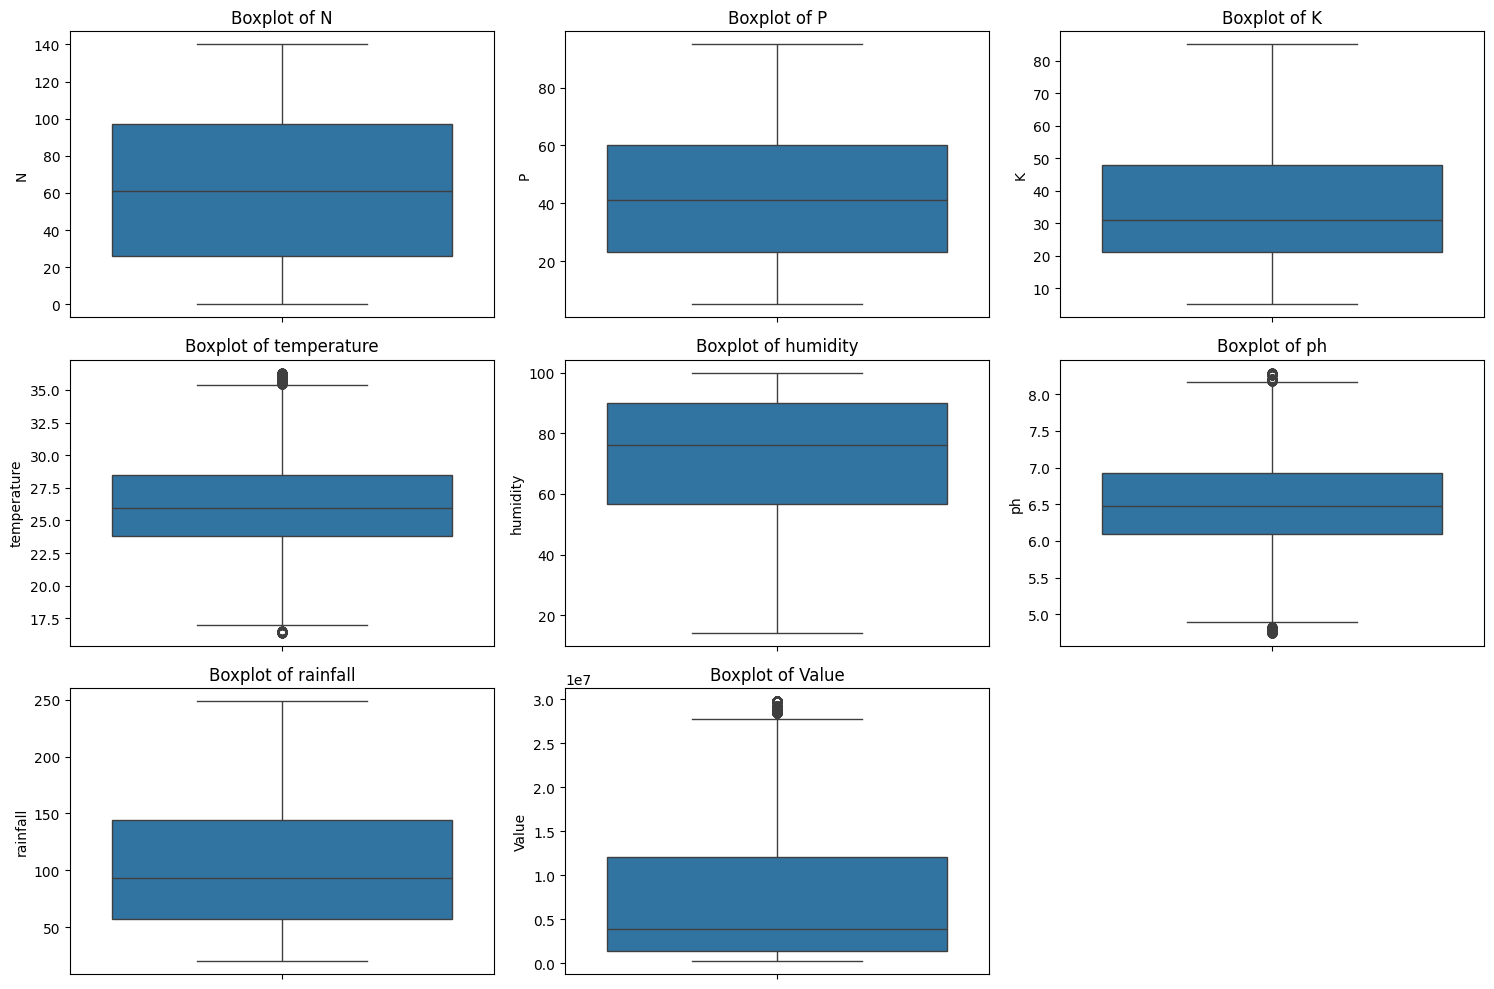

In [21]:
plt.figure(figsize=(15,10))
cols = ['N','P','K','temperature','humidity','ph','rainfall','Value']

for i, col in enumerate(cols,1):
    plt.subplot(3,3,i)
    sns.boxplot(data=final_df, y=col)
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [16]:
final_df.to_csv("Clean_FAOSTAT_Crop_18crops.csv", index=False)
print("Dataset saved successfully")

Dataset saved successfully


In [17]:
print("Unique crops:", sorted(final_df["crop"].unique()))
print("Number of unique crops:", final_df["crop"].nunique())
print(final_df["crop"].value_counts())


Unique crops: ['banana', 'chickpea', 'coconut', 'coffee', 'cotton', 'jute', 'lentil', 'maize', 'mango', 'mothbeans', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'watermelon']
Number of unique crops: 15
crop
coconut       2400
jute          2400
lentil        2400
watermelon    2400
cotton        2400
coffee        2300
muskmelon     2300
mango         2232
chickpea      2088
pigeonpeas    2016
maize         2000
banana        1700
orange        1617
papaya        1488
mothbeans     1296
Name: count, dtype: int64


In [18]:
print("Rows:", final_df.shape[0])
print("Columns:", final_df.shape[1])

Rows: 31037
Columns: 10


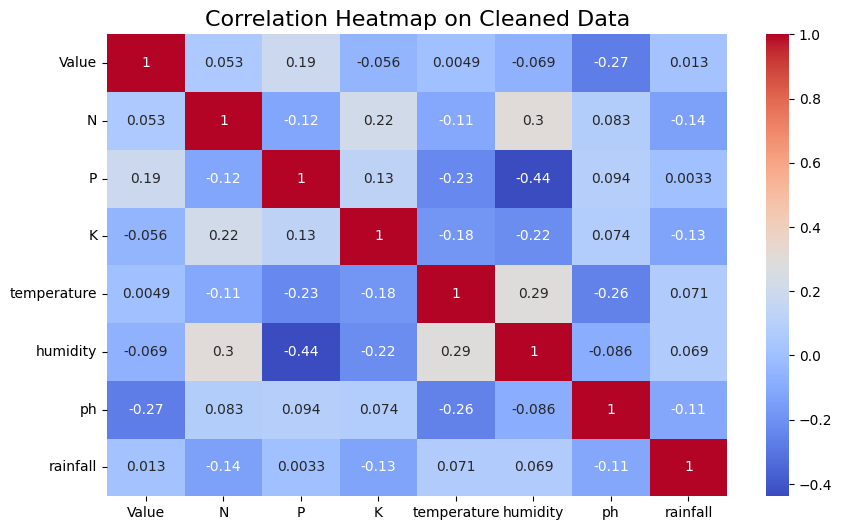

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(final_df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap on Cleaned Data", fontsize=16)
plt.show()

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
X = final_df.drop(columns=["Value", "Element"], errors="ignore")
y = final_df["Value"]

X = pd.get_dummies(X, columns=["crop"], drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=32
)


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=200, random_state=42
    ),
    "XGBoost": XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
    ),
}

In [ ]:
print("Training and Evaluating Models...\n")

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"=== {name} ===")
    print(f"Train MSE : {mse_train:.2f}")
    print(f"Train MAE : {mae_train:.2f}")
    print(f"Train RMSE: {rmse_train:.2f}")
    print(f"Train Accuracy (R²): {r2_train * 100:.2f}%")
    print(f"Test  MSE : {mse_test:.2f}")
    print(f"Test  MAE : {mae_test:.2f}")
    print(f"Test  RMSE: {rmse_test:.2f}")
    print(f"Test  Accuracy (R²): {r2_test * 100:.2f}%\n")

Training and Evaluating Models...

=== Linear Regression ===
Train MSE : 9224032889148.71
Train MAE : 1880180.29
Train RMSE: 3037109.30
Train Accuracy (R²): 85.06%
Test  MSE : 9365843763682.54
Test  MAE : 1896678.88
Test  RMSE: 3060366.61
Test  Accuracy (R²): 85.09%

=== Random Forest ===
Train MSE : 9062832669331.49
Train MAE : 1857576.25
Train RMSE: 3010453.90
Train Accuracy (R²): 85.32%
Test  MSE : 10566651972202.59
Test  MAE : 1998002.93
Test  RMSE: 3250638.70
Test  Accuracy (R²): 83.18%

=== XGBoost ===
Train MSE : 9103249682490.21
Train MAE : 1875798.38
Train RMSE: 3017159.21
Train Accuracy (R²): 85.25%
Test  MSE : 10254314669437.93
Test  MAE : 1975683.31
Test  RMSE: 3202235.89
Test  Accuracy (R²): 83.68%



In [ ]:
xg_base = XGBRegressor(
    random_state=42,
    n_jobs=-1,
)

param_grid = {
    "max_depth": [3, 5],
    "learning_rate": [0.05, 0.1],
    "n_estimators": [200, 300],
    "subsample": [0.8],
    "colsample_bytree": [0.8],
}

grid = GridSearchCV(
    estimator=xg_base,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=3,
    n_jobs=-1,
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

In [ ]:
y_grid_train_pred = best_model.predict(X_train)
y_grid_test_pred = best_model.predict(X_test)

print("Hyper XGBoost Train Accuracy (R²):",
      r2_score(y_train, y_grid_train_pred) * 100)

print("Hyper XGBoost Test  Accuracy (R²):",
      r2_score(y_test, y_grid_test_pred) * 100)

Hyper XGBoost Train Accuracy (R²): 84.97949997542801
Hyper XGBoost Test  Accuracy (R²): 84.28998461203766


In [ ]:
df_encoded = final_df.copy()
encoder = LabelEncoder()
df_encoded["Crops"] = encoder.fit_transform(df_encoded["crop"])
df_encoded = df_encoded.drop(columns=["crop"])

X2 = df_encoded.drop(columns=["Value", "Element"], errors="ignore")
y2 = df_encoded["Value"]

scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2_scaled, y2, test_size=0.25, random_state=32
)

xg_model = XGBRegressor(
    **grid.best_params_,
    random_state=42,
    n_jobs=-1,
)

xg_model.fit(X_train2, y_train2)

y_train_pred2 = xg_model.predict(X_train2)
y_test_pred2 = xg_model.predict(X_test2)

print("Scaled-XGB Train Accuracy (R²):",
      r2_score(y_train2, y_train_pred2) * 100)

print("Scaled-XGB Test  Accuracy (R²):",
      r2_score(y_test2, y_test_pred2) * 100)

Scaled-XGB Train Accuracy (R²): 85.06540708370242
Scaled-XGB Test  Accuracy (R²): 84.38394628897406


In [ ]:
sample_data = {
    "N": 110,
    "P": 50,
    "K": 48,
    "temperature": 27.5,
    "humidity": 80,
    "ph": 6.2,
    "rainfall": 190,
    "Year": 2018,
    "Crops": "banana",
}

sample_data["Crops"] = encoder.transform([sample_data["Crops"]])[0]
sample_df = pd.DataFrame([sample_data])[X2.columns]
sample_scaled = scaler.transform(sample_df)

pred_value = int(xg_model.predict(sample_scaled)[0])
print("Predicted Value for sample:", pred_value)


Predicted Value for sample: 20654150
